# <span style="color:green">  Numerical exercises 2</span>

## <span style="color:red"> Exercise 2.1</span>

#### <span style="color:black"> Objective </span>

The focus of the first exercise is the evaluation of the following integral by monte carlo method:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
In the first part using a uniform distribution in the range $[0,1]$ while in the second part using importance sampling. 

#### <span style="color:black"> Code's description </span>

The code was built around three classes: integral, funzionebase and simulation. Simulation is the same of previous exercise and it will not be discussed again. Integral and funzionebase are the same classes of TNDS class with some little change. In integral it was added the imporance sampling method and eliminated other non monte-carlo expect simpson which is the best one I know for low dimensionality. Funzionebase remained exactly the same, It was created only the two "son" classes with our function of interest and the importance sampling modified function of interest. How importance sampling modified the function is explained below.

#### <span style="color:black"> Implementing Importance Sampling</span>

In this case I decided to taylor expand $f(x)=\frac{\pi}{2}\cos(\pi x/2)$ in $x=1$ so that the zero order term will vanish, otherwise it's not possible to reverse the comulative distribution. After the necessary normalization the choice for $g(x)$ is $g(x)=-2(x-1)$. The recipe for sampling this distribution is:

$$1-\sqrt{(1-y)}$$

with $y$ random generated between $0$ and $1$

#### <span style="color:black"> Statistics and results </span>

The average and error are estimated with use of blocking method with $N$ equal to $100$ and $M$ to $10^5$, this means that each integral is evaluated with $L=M/N=1000$ steps.

The results are show in the pictures below where I've ploted $I-1$, the first one is the uniform distributed integral while the second one is the importance sampling integral. The comparison between this picture clearly shows that both integral converge to the correct value but importance sampling integral has a smaller variance.

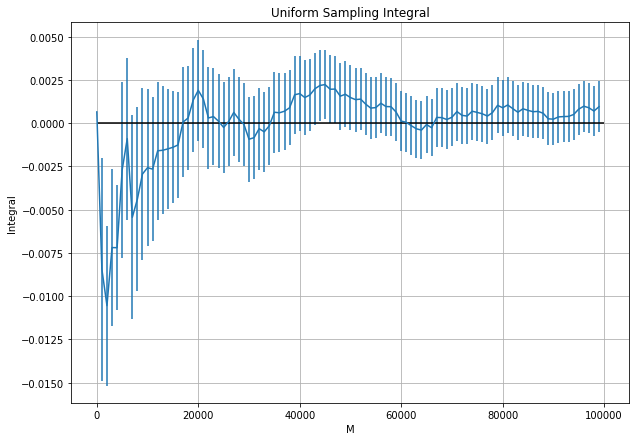

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(100)
x*=1000
ave, err =np.loadtxt("int.dat", unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave-1,yerr=err)
plt.hlines(0,0,100000)
plt.xlabel("M")
plt.ylabel("Integral")
plt.title("Uniform Sampling Integral")
plt.grid(True)
plt.show()

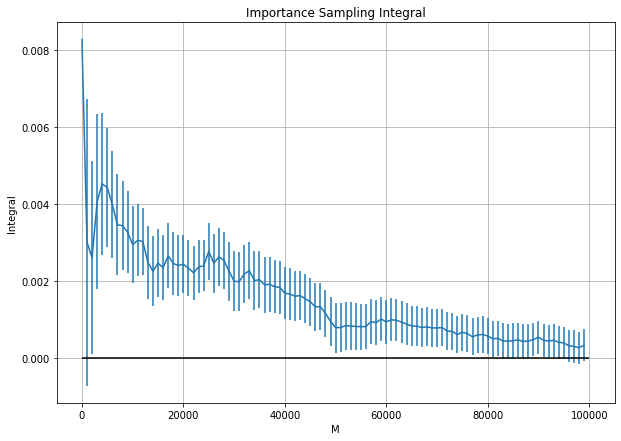

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(100)
x*=1000
ave, err=np.loadtxt("intis.dat", unpack=True)


fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave-1,yerr=err)
plt.hlines(0,0,100000)
plt.xlabel("M")
plt.ylabel("Integral")
plt.title("Importance Sampling Integral")
plt.grid(True)
plt.show()

## <span style="color:red"> Exercise 2.2</span>

#### <span style="color:black"> Objective </span>

This simulation aims to reproduce a 3D Random Walks (RW) on a cubic lattice and in the continuum starting from the origin. In particular we want to show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

#### <span style="color:black"> algorithm for Random Walk on a cubic lattice </span>

The cubic lattice has side $a=1$ and the walker can make one step forward or backward in one of three directions $x$,$y$ or $z$ at a discrete time. I assigned to the directions an interval namely:
-  x as $[0,1)$
-  y as $[1,2)$
-  z as $[2,3)$

The walker will move in the direction decided by the occurence in one of the previous range of a random exctraction in $[0,3)$. After that a second number will be extracted in $[-1,1]$ if it is positive the walker will move forward otherwise backward

#### <span style="color:black"> Algorithm for Random Walk in the continuum </span>

The walker can make a step of lenght $a=1$ at each discrete time in every direction. In this case we need to random generate the solid angle, which consists of $\theta$ in the range $[0,\pi]$ and $\phi$ in the range $[0,2\pi]$. With $a$ and the angles $\theta$ and $\phi$ we calculate the three spherical coordinates of the displacement $\Delta \vec{x}$ and add this to the coordinates of the previous step of the walker $\vec{x_n}$ so that $\vec{x_{n+1}} =\vec{x_n}+\Delta \vec{x}$. 
For sampling the solid angle is enough to random generate three number $x$,$y$ and $z$ on the unit sphere and use the inverse relation to obtain $\theta$ and $\phi$ as it follows:

-  $\theta=\arctan{\frac{z}{\sqrt{x^2+y^2}}}$
-  $\phi=\arctan{\frac{y}{x}}$

#### <span style="color:black"> C$++$ Implementation </span>

The implementation was made with use of a c++ class called $RandomWalk$. It takes in input the starting point, under the form of three double, and the length of the step. The two main methods are the $MakeDiscreteStep$ that implent the algorithm for cubic lattice RW and $MakeContinuosStep$ which implement the continuum RW. Both this methods takes in input the last point from which they will move and make the moves. 

#### <span style="color:black"> Making of simulation and statistics </span>

I used $M=10^4$ walker and with the use of blocking method,$N=100$, I made the average and standard deviation of $|\vec{r}_N|^2$ at each discrete step, the simulation consists in $100$ steps. Then taking the root I've obtained the quantity of interest but not its uncertainty. In fact the uncertainty does not coincide with the standard deviation, $SD$, because we need to propagate the error. Computing the propagation as usuale we obtain, for uncertainty $\sigma_N$:

$$\sigma_N=\frac{SD_N}{2\sqrt{$|\vec{r}_N|^2$}}$$


#### <span style="color:black"> Results </span>

The results are visible in two picture below, the first one for the cubic lattice while the second one for the continuum. I've fitted the results with the expected law for a diffusive behavior, $f(N)=k\sqrt{N}$, and as can be seen both of them agree perfectly with this law. 

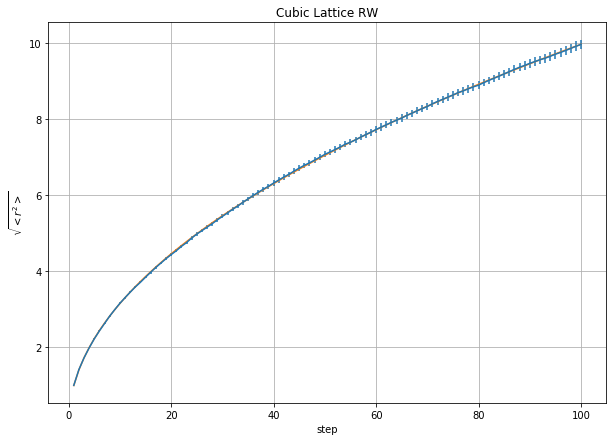

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


def f(x,a):
    return a*np.sqrt(x);

x=np.arange(100)
x+=1
ave, err =np.loadtxt("RWsc.dat", unpack=True)


fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave,yerr=err)
plt.xlabel("step")
plt.ylabel("$\sqrt{<r^2>}$")
plt.title("Cubic Lattice RW")
plt.grid(True)

p_opt, p_cov = curve_fit(f, x, ave)
walk_fit = f(x,p_opt)
plt.plot(x,walk_fit)

plt.show()

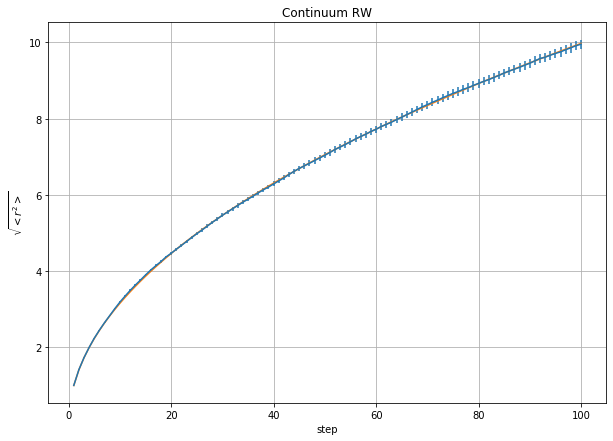

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


def f(x,a):
    return a*np.sqrt(x);

x=np.arange(100)
x+=1
ave, err=np.loadtxt("RWc.dat", unpack=True )


fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave,yerr=err)
plt.xlabel("step")
plt.ylabel("$\sqrt{<r^2>}$")
plt.title("Continuum RW")
plt.grid(True)

p_opt, p_cov = curve_fit(f, x, ave)
walk_fit = f(x,p_opt)
plt.plot(x,walk_fit)

plt.show()